In [3]:
!pip install tensorflow
!pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Import support libraries for plotting
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


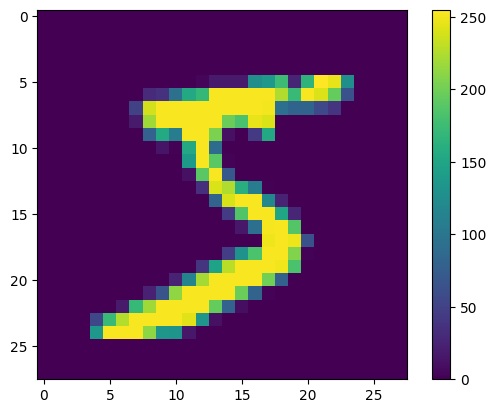

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
print(y_train[0])

5


In [8]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(216, activation='relu'),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


z:\env\python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 216)            │       110,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        27,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,538 (2.10 MB)

 Trainable params: 551,538 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=15)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.1957 - loss: 2.2324
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3426 - loss: 1.5998
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6276 - loss: 1.0019
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9360 - loss: 0.3166
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.9519 - loss: 0.1988
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9639 - loss: 0.1511
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9710 - loss: 0.1197
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9746 - loss: 0.1087
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9773 - loss: 0.0952
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9813 - loss: 0.0805
Epoch 11/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9822 - loss: 0.0740
Epoch 12/20
4000/40

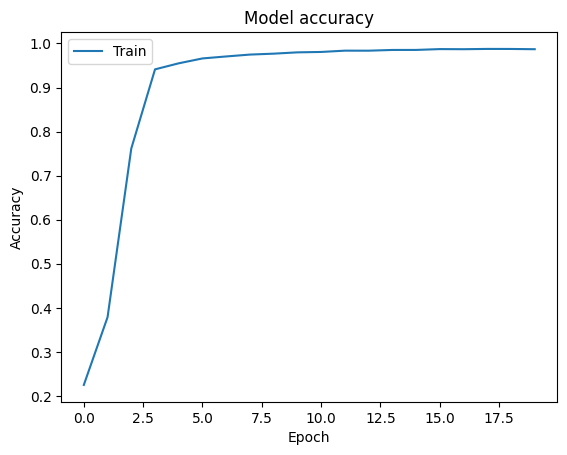

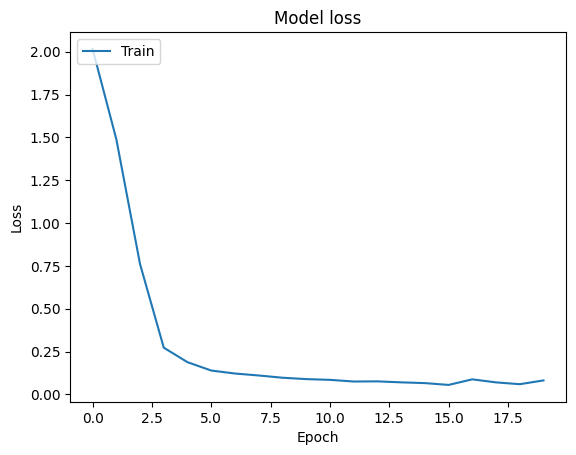

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Test accuracy: 0.972000002861023
Test loss: 0.2256866693496704


In [15]:
print(x_test[0])
print(y_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19